In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(
    "annotated_metadata.tsv",
    sep="\t",
    parse_dates=["date", "submission_date", "ideal_submission_date"],
)

In [3]:
df.head()

,strain,virus,segment,accession,date,submission_date,region,country,division,location,passage,originating_lab,submitting_lab,age,gender,ideal_submission_date
0,A/Victoria/50/2022,flu,ha,EPI2030270,2022-03-21,2022-05-09,oceania,australia,victoria,victoria,cell,dorevtich_pathology,who_collaborating_centre_for_reference_and_res...,82y,female,2022-04-25
1,A/Victoria/53/2022,flu,ha,EPI2030222,2022-03-22,2022-05-09,oceania,australia,victoria,victoria,cell,dorevtich_pathology,who_collaborating_centre_for_reference_and_res...,68y,female,2022-04-26
2,A/Victoria/52/2022,flu,ha,EPI2030214,2022-03-23,2022-05-09,oceania,australia,victoria,victoria,cell,dorevtich_pathology,who_collaborating_centre_for_reference_and_res...,21y,male,2022-04-27
3,A/Victoria/54/2022,flu,ha,EPI2030230,2022-03-23,2022-05-09,oceania,australia,victoria,victoria,cell,dorevtich_pathology,who_collaborating_centre_for_reference_and_res...,18y,male,2022-04-27
4,A/Victoria/51/2022,flu,ha,EPI2030206,2022-03-22,2022-05-09,oceania,australia,victoria,victoria,cell,dorevtich_pathology,who_collaborating_centre_for_reference_and_res...,19y,female,2022-04-26


In [4]:
observed_delay = (df["submission_date"] - df["date"]).dt.days.values

In [5]:
observed_delay

array([ 49,  48,  47, ..., 130,  87,  47])

In [6]:
ideal_delay = (df["ideal_submission_date"] - df["date"]).dt.days.values

In [7]:
ideal_delay

array([35, 35, 35, ..., 71, 43, 47])

In [10]:
bins = np.arange(0, 365, 7)

In [11]:
bins

array([  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84,
        91,  98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175,
       182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252, 259, 266,
       273, 280, 287, 294, 301, 308, 315, 322, 329, 336, 343, 350, 357,
       364])

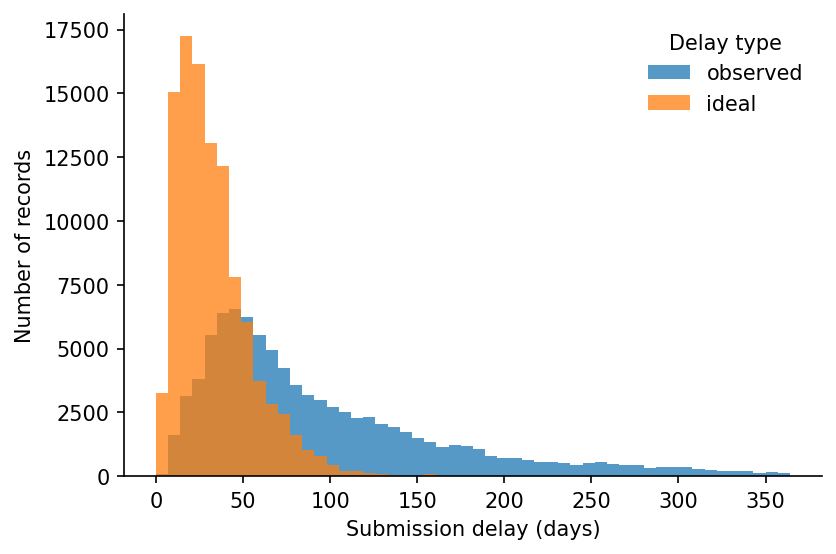

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=150)
ax.hist(
    observed_delay,
    bins=bins,
    label="observed",
    alpha=0.75,
)
ax.hist(
    ideal_delay,
    bins=bins,
    label="ideal",
    alpha=0.75,
)

ax.legend(
    frameon=False,
    title="Delay type",
)

ax.set_xlabel("Submission delay (days)")
ax.set_ylabel("Number of records")

sns.despine()

In [21]:
np.mean(observed_delay)

303.04079814545173

In [22]:
np.median(observed_delay)

85.0

In [23]:
np.mean(ideal_delay)

32.46201816231129

In [24]:
np.median(ideal_delay)

28.0

In [25]:
np.median(ideal_delay) / np.median(observed_delay)

0.32941176470588235